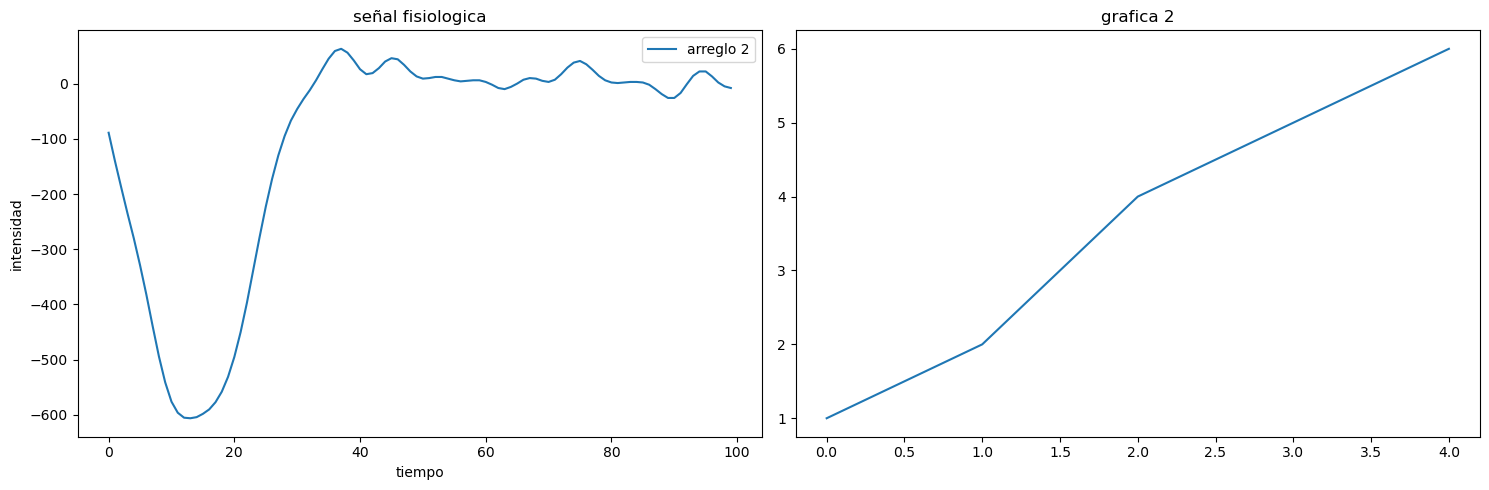

In [16]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def Verificar_entero(entrada):
    while True:
        dato_int = input(f'ingrese {entrada}')
        try:
            return int(dato_int)
        except:
            print(f'para {entrada} debe ingresar un numero entero.')
            continue
class archivo_mat:
    def __init__(self,ruta_archivo = "r01_edfm (1).mat"):
        self.__data = loadmat(ruta_archivo)['val']
        self.__shape = self.__data.shape
    
    def obten_data(self):
        return self.__data
    
    def obten_limites(self): 
        while True:
            #limite inferior
            Linf = Verificar_entero(f'el valor mínimo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)\n=>')
            if Linf<0 or Linf>=self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            #Limite superior
            Lsup = Verificar_entero(f'ingrese el valor máximo del rango en el/los arreglo/s que desea graficar (hay {self.__shape[1]} valores)\n=>')
            if Lsup<=0 or Lsup>self.__shape[1]:
                print('ingrese un valor que esté dentro del rango del arreglo... reintentando')
                continue
            if Lsup<=Linf:
                print('el maximo debe ser mayor al mínimo... reintentando')
                continue
            else:
                return (Linf,Lsup)
    def devoler_arreglo_s(self):
        dict_arreglos = {}
        linf,lsup = self.obten_limites()
        while True:
            sub_menu = Verificar_entero('la opción que desea(el número) \n1.graficar un arreglo\n2.graficar varios arreglos\n3.graficar todos los arreglos\n4.volver al menu principal\n=>')
            
            if sub_menu == 1: #un solo arreglo
                while True:
                    opc = Verificar_entero('cual de los 6 arreglos desea graficar(número del 1 al 6):\n=>')
                    if 1<= opc <= 6:
                        dict_arreglos[f'arreglo {opc}'] = self.__data[opc-1 , linf:lsup]
                        return linf, lsup, dict_arreglos
                    else:
                        print('ingrese un numero de arreglo valido(numero del 1 al 6)')
            
            elif sub_menu == 2:#varios arreglos
                while True:
                    num_arreglos = Verificar_entero('cuantos arreglos desea graficar (1 a 6)\n=>')
                    if 1<= num_arreglos <= 6:
                        break
                    else:
                        print('ingrese un valor entre 1 y 6')

                while True:
                    for i in range(10000):
                        if len(list(dict_arreglos.keys())) >= num_arreglos:
                            break
                        opc = Verificar_entero('cual de los 6 arreglos desea graficar(número del 1 al 6):\n=>')
                        if opc < 1 or opc > 6:
                            print('ingrese un valor entre 1 y 6... reintentando')
                            continue
                        try:
                            if dict_arreglos[f'arreglo {opc}'] in self.__data[opc-1 , linf:lsup]:
                                print('este arreglo ya fue seleccionado... intentando de nuevo.')
                                continue
                        except:
                            pass

                        if len(list(dict_arreglos.keys())) < num_arreglos:
                            dict_arreglos[f'arreglo {opc}'] = self.__data[opc-1 , linf:lsup]


                    return linf, lsup, dict_arreglos
            
            elif sub_menu==3: #todos los arreglos
                for i in range(6):
                    dict_arreglos[f'arreglo {i+1}'] = self.__data[i , linf : lsup]

                return linf, lsup, dict_arreglos
            
            elif sub_menu==4:
                return None
            else:

                print('seleccione una opción válida')
                continue
    def graficar_mat(self):
        linf, lsup, dict_arreglos = self.devoler_arreglo_s()
        llaves_arreglos = list(dict_arreglos.keys())
        X = np.arange(lsup-linf)                 
        num_arreglos = len(llaves_arreglos)  

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))                                          
        cont = 0
        for i in llaves_arreglos:
            ax1.plot(X, (dict_arreglos[i] + cont), label=i)    #Graficar Canales
            cont = cont + 20
        ax1.legend()
        ax1.set_ylabel('intensidad')
        ax1.set_xlabel('tiempo')
        ax1.set_title('señal fisiologica')

        x = np.arange(5)                                   #empieza a graficar de espectro frecuencias
        y = np.array([1, 2, 4, 5, 6])
        ax2.plot(x, y)
        ax2.set_title('grafica 2')

        plt.tight_layout()   # Ajustar el espaciado entre subplots
        plt.show()

a = archivo_mat()
a.graficar_mat()

In [ ]:
def main():
    while True:
        menu = Verificar_entero('la opcion deseada=>\n1. graficar con el archivo MATLAB\n2.gestionar el archivo CSV\n3.salir\n=>')
        if menu ==1:
            a = archivo_mat()
            a.graficar_mat()
        elif menu==2:
            pass
        elif menu==3:
            print('cerrando sistema...')
            break
        else:
            print('seleccione una opción valida... reintentando')
            continue

In [ ]:
#lo que sale de devolver todos los arreglos, probar con un rango corto para ver si funciona el orden
señal = archivo_mat()
linf,lsup,dict_arreglos = señal.devoler_arreglo_s()
llaves_arreglos = list(dict_arreglos.keys())
print(f'limite inferior: {linf}\nlimite superior: {lsup}\ndiccionario de arreglos:')
cont = 0
for i in llaves_arreglos:
    print(f'{llaves_arreglos[cont]} = {dict_arreglos[i]}')
    cont += 1
    continue
print('-'*30)
print(f'{llaves_arreglos}')

In [ ]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datos_mat = loadmat("r01_edfm (1).mat")['val']
linf = 1500
lsup = 2000
x = np.arange(lsup-linf)
plt.subplot(111)
plt.plot(x,datos_mat[3,linf:lsup])
plt.xlabel('tiempo')
plt.ylabel('intensidad')
plt.show